In [1]:
# Standard import(s)
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import random as rn
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing # Import preprocessing for String-Int conversion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer


C:\Users\gagga\.conda\envs\daml\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\gagga\.conda\envs\daml\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\gagga\.conda\envs\daml\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\gagga\.conda\envs\daml\lib\site-packages\tensorflow\python\framework\dtypes.

In [18]:
# Keras import(s)
if float(tf.__version__[:3])>2.8:
    from tensorflow.keras.utils import plot_model
else:
    from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense, Flatten, Reshape, Embedding, GlobalAveragePooling1D,Conv1D,MaxPool1D,Dropout, Bidirectional ,UpSampling1D, SimpleRNN,LSTM
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [3]:

# convert phrases to numerical representation: bag of words
phrase_data = pd.read_pickle("clean_phrase_data4.pkl") 
labels = ['very negative', 'negative', 'neutral', 'positive', 'very positive']

#split phrase datasets to x and y
X = phrase_data["feature"].copy()
y = phrase_data["label"].copy()


#create word vector 
vectorizer = CountVectorizer()
vectorizerfit = vectorizer.fit_transform(X.astype(str))
names = vectorizer.get_feature_names()
count_array = vectorizerfit.toarray()
vec = pd.DataFrame(data=count_array,columns=names)

x_train, x_test, y_train, y_test = train_test_split(vec, y, test_size=0.3, random_state=1) # 70% training and 30% test
print(x_train.shape,x_test.shape,y_train.ravel().shape)
shape = x_train.shape[1]
xshape = x_train.shape[0]

(106412, 17719) (45606, 17719) (106412,)


# Dense networks

In [4]:
###########this model overtrains - high training acc, low testing acc

inputs = Input(shape=shape)
encoded_h1 = Dense(256, activation='relu')(inputs)
encoded_h2 = Dense(128, activation='relu')(encoded_h1)
encoded_h3 = Dense(64, activation='relu')(encoded_h2)
encoded_h4 = Dense(32, activation='relu')(encoded_h3)
encoded_h5 = Dense(16, activation='relu')(encoded_h4)
output = Dense(len(labels),activation='softmax')(encoded_h5)
mdl = Model(inputs,output)

mdl.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17719)]           0         
_________________________________________________________________
dense (Dense)                (None, 256)               4536320   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________

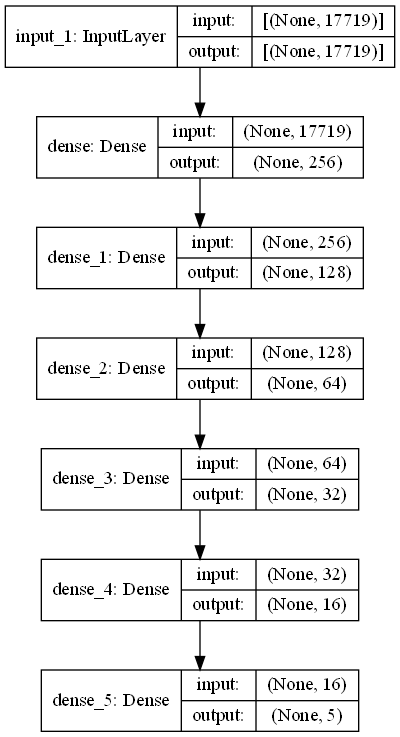

In [5]:
plot_model(mdl, show_shapes=True)

In [6]:
mdl.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

cnn = mdl.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Train on 85129 samples, validate on 21283 samples
Epoch 1/20
85129/85129 [==============================] - 44s 515us/sample - loss: 1.1369 - acc: 0.5176 - val_loss: 1.0395 - val_acc: 0.5490
Epoch 2/20
85129/85129 [==============================] - 42s 498us/sample - loss: 0.9200 - acc: 0.5955 - val_loss: 1.0361 - val_acc: 0.5517
Epoch 3/20
85129/85129 [==============================] - 42s 498us/sample - loss: 0.7915 - acc: 0.6421 - val_loss: 1.1026 - val_acc: 0.5199
Epoch 4/20
85129/85129 [==============================] - 43s 500us/sample - loss: 0.6815 - acc: 0.6803 - val_loss: 1.2325 - val_acc: 0.5147
Epoch 5/20
85129/85129 [==============================] - 43s 502us/sample - loss: 0.5931 - acc: 0.7151 - val_loss: 1.3633 - val_acc: 0.4915
Epoch 6/20
85129/85129 [==============================] - 43s 507us/sample - loss: 0.5217 - acc: 0.7457 - val_loss: 1.5677 - val_acc: 0.4759
Epoch 7/20
85129/85129 [==============================] - 43s 502us/sample - loss: 0.4655 - acc: 0.7652 

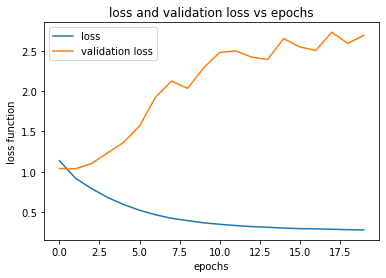

In [7]:
plt.plot(cnn.history['loss'],label="loss")
plt.plot(cnn.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [8]:
misc,testacc = mdl.evaluate(x_test,y_test)
misc,trainacc = mdl.evaluate(x_train,y_train)

print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

106412/106412 [==============================] - 15s 140us/sample - loss: 0.7340 - acc: 0.7641: 7s - loss: 0.2447 -  - ETA: 6s - ETA: 5s - loss - ETA: 4s - loss: 0.2435 - acc: 0. - ETA - ETA: 2s - lo - ETA: 0s - loss: 0.5974 - acc - ETA: 0s - loss: 0.6617 - a
Overall accuracy for training dataset: 76.40961408615112%
Overall accuracy for testing dataset: 40.389421582221985%


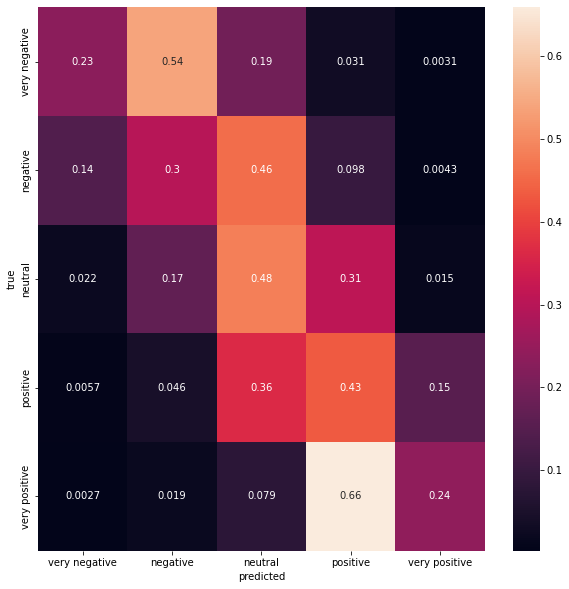

In [9]:
matrix = confusion_matrix(y_test,mdl.predict(x_test).argmax(axis=-1), normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()



## same model but with regularisation, less complexity +dropout

In [10]:



inputs = Input(shape=shape)
encoded_h1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(inputs)
encoded_h2 = Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(encoded_h1)
drop = Dropout(0.25)(encoded_h2)
encoded_h3 = Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(drop)
drop = Dropout(0.25)(encoded_h3)
encoded_h4 = Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(drop)
drop = Dropout(0.25)(encoded_h4)
output = Dense(len(labels),activation='softmax')(drop)
mdlreg = Model(inputs,output)

mdlreg.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 17719)]           0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               2268160   
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528 

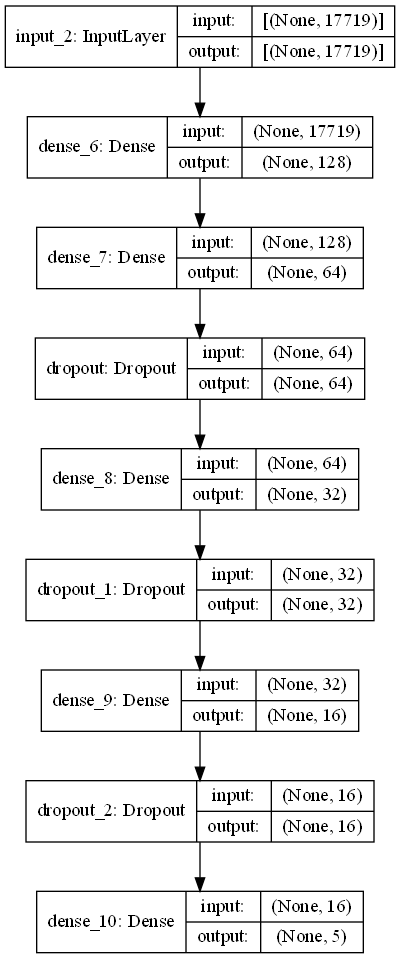

In [11]:
plot_model(mdlreg, show_shapes=True)

In [12]:
mdlreg.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

cnnreg = mdlreg.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Train on 85129 samples, validate on 21283 samples
Epoch 1/20
85129/85129 [==============================] - 49s 574us/sample - loss: 1.3679 - acc: 0.5009 - val_loss: 1.2787 - val_acc: 0.5409
Epoch 2/20
85129/85129 [==============================] - 49s 572us/sample - loss: 1.2476 - acc: 0.5460 - val_loss: 1.2083 - val_acc: 0.5495
Epoch 3/20
85129/85129 [==============================] - 49s 573us/sample - loss: 1.1640 - acc: 0.5638 - val_loss: 1.1741 - val_acc: 0.5553
Epoch 4/20
85129/85129 [==============================] - 49s 572us/sample - loss: 1.1096 - acc: 0.5779 - val_loss: 1.1561 - val_acc: 0.5542
Epoch 5/20
85129/85129 [==============================] - 49s 571us/sample - loss: 1.0778 - acc: 0.5882 - val_loss: 1.1625 - val_acc: 0.5525
Epoch 6/20
85129/85129 [==============================] - 48s 568us/sample - loss: 1.0530 - acc: 0.5944 - val_loss: 1.1657 - val_acc: 0.5501
Epoch 7/20
85129/85129 [==============================] - 49s 578us/sample - loss: 1.0388 - acc: 0.6002 

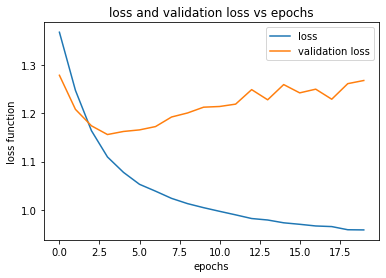

In [13]:
plt.plot(cnnreg.history['loss'],label="loss")
plt.plot(cnnreg.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [14]:
misc,testacc = mdlreg.evaluate(x_test,y_test)
misc,trainacc = mdlreg.evaluate(x_train,y_train)

print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

106412/106412 [==============================] - 23s 218us/sample - loss: 0.9358 - acc: 0.6491 - loss: 0.92
Overall accuracy for training dataset: 64.90621566772461%
Overall accuracy for testing dataset: 53.076350688934326%


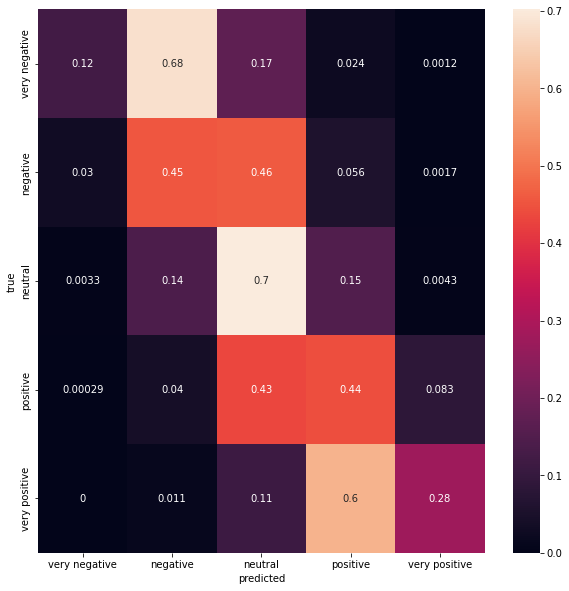

In [15]:
matrix = confusion_matrix(y_test,mdlreg.predict(x_test).argmax(axis=-1), normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

## Multi-layer Perceptron (Dense Neural Network) model - like before but with embedding

In [16]:

inputs = Input(shape=shape)
embedding = Embedding(input_dim=xshape, output_dim=32, input_length = shape)(inputs)
flat = Flatten()(embedding)
encoded_h1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(flat)
encoded_h2 = Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(encoded_h1)
drop = Dropout(0.25)(encoded_h2)
encoded_h3 = Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(drop)
drop = Dropout(0.25)(encoded_h3)
encoded_h4 = Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(drop)
drop = Dropout(0.25)(encoded_h4)
output = Dense(len(labels),activation='softmax')(drop)
mdlmlp = Model(inputs,output)

mdlmlp.summary()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 17719)]           0         
_________________________________________________________________
embedding (Embedding)        (None, 17719, 32)         3405184   
_________________________________________________________________
flatten (Flatten)            (None, 567008)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               72577152  
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_______

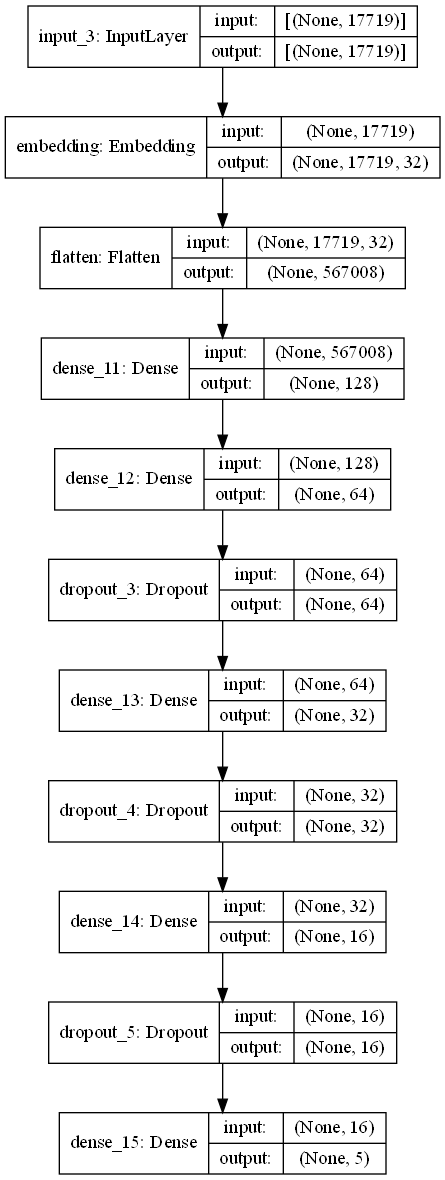

In [17]:
plot_model(mdlmlp, show_shapes=True)

In [18]:
mdlmlp.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

mlp = mdlmlp.fit(x_train,y_train,epochs=10,batch_size=256, validation_split=0.2)

Train on 85129 samples, validate on 21283 samples
Epoch 1/10
85129/85129 [==============================] - 456s 5ms/sample - loss: 1.7884 - acc: 0.4285 - val_loss: 1.4758 - val_acc: 0.4524
Epoch 2/10
85129/85129 [==============================] - 451s 5ms/sample - loss: 1.4888 - acc: 0.4531 - val_loss: 1.4899 - val_acc: 0.4524
Epoch 3/10
85129/85129 [==============================] - 467s 5ms/sample - loss: 1.5286 - acc: 0.4601 - val_loss: 1.5039 - val_acc: 0.4919
Epoch 4/10
85129/85129 [==============================] - 449s 5ms/sample - loss: 1.5372 - acc: 0.4924 - val_loss: 1.4821 - val_acc: 0.5320
Epoch 5/10
85129/85129 [==============================] - 438s 5ms/sample - loss: 1.5013 - acc: 0.5276 - val_loss: 1.4481 - val_acc: 0.5451
Epoch 6/10
85129/85129 [==============================] - 434s 5ms/sample - loss: 1.4444 - acc: 0.5434 - val_loss: 1.4377 - val_acc: 0.5468
Epoch 7/10
85129/85129 [==============================] - 438s 5ms/sample - loss: 1.3938 - acc: 0.5558 - val_l

106412/106412 [==============================] - 445s 4ms/sample - loss: 1.1880 - acc: 0.6150
Overall accuracy for training dataset: 61.499643325805664%
Overall accuracy for testing dataset: 54.712098836898804%


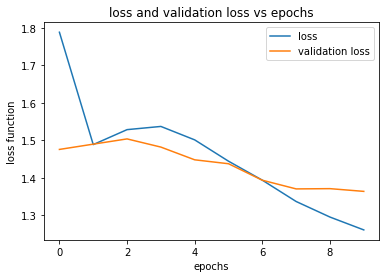

In [19]:
misc,testacc = mdlmlp.evaluate(x_test,y_test)
misc,trainacc = mdlmlp.evaluate(x_train,y_train)

print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

plt.plot(mlp.history['loss'],label="loss")
plt.plot(mlp.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()

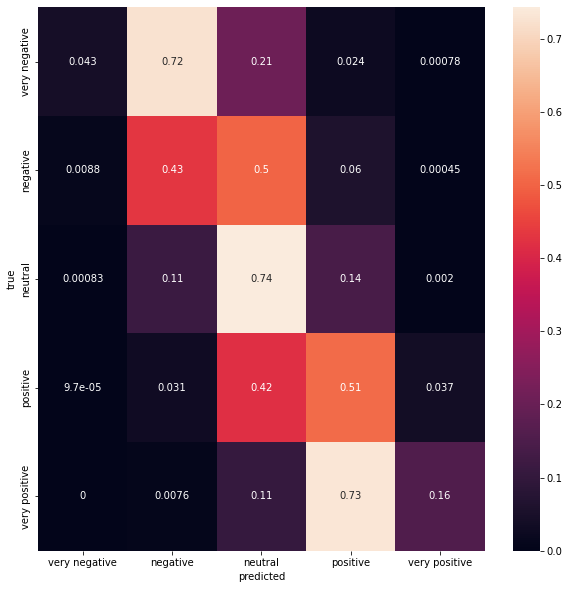

In [20]:
matrix = confusion_matrix(y_test,mdlmlp.predict(x_test).argmax(axis=-1), normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

#  RNN (Recurrent Neural Network)

In [4]:


inputs = Input(shape=(shape))
embedding = Embedding(input_dim=xshape, output_dim=32, input_length = shape)(inputs)
bi = Bidirectional(SimpleRNN(50))(embedding)
dense1 = Dense(64, activation='relu')(bi)
output = Dense(len(labels),activation='softmax')(dense1)
mdlrnn = Model(inputs,output)

mdlrnn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17719)]           0         
_________________________________________________________________
embedding (Embedding)        (None, 17719, 32)         3405184   
_________________________________________________________________

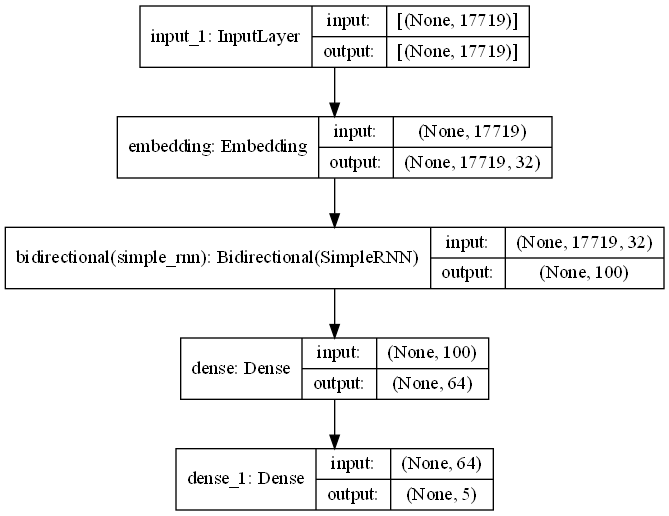

In [5]:
plot_model(mdlrnn, show_shapes=True)

In [ ]:
mdlrnn.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

rnn = mdlrnn.fit(x_train,y_train,epochs=10,batch_size=256, validation_split=0.2)

Train on 85129 samples, validate on 21283 samples
Epoch 1/10


In [ ]:
misc,testacc = mdlrnn.evaluate(x_test,y_test)
misc,trainacc = mdlrnn.evaluate(x_train,y_train)

print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

plt.plot(rnn.history['loss'],label="loss")
plt.plot(rnn.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
matrix = confusion_matrix(y_test,mdlrnn.predict(x_test).argmax(axis=-1), normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

#  LSTM (Long Short-Term Memory)

In [ ]:

inputs = Input(shape=(shape))
embedding = Embedding(input_dim=xshape, output_dim=32, input_length = shape)(inputs)
bi = Bidirectional(LSTM(50))(embedding)
dense1 = Dense(64, activation='relu')(bi)
output = Dense(len(labels),activation='softmax')(dense1)
mdllstm = Model(inputs,output)

mdllstm.summary()

In [ ]:
plot_model(mdllstm, show_shapes=True)

In [ ]:
mdllstm.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

lstm1 = mdllstm.fit(x_train,y_train,epochs=10,batch_size=256, validation_split=0.2)

In [ ]:
misc,testacc = mdllstm.evaluate(x_test,y_test)
misc,trainacc = mdllstm.evaluate(x_train,y_train)

print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

plt.plot(lstm1.history['loss'],label="loss")
plt.plot(lstm1.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
matrix = confusion_matrix(y_test,lstm1.predict(x_test).argmax(axis=-1), normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

# Convolutional NN

In [ ]:
# 1D CNN
inputs = Input(shape=(shape))
embedding = Embedding(input_dim=xshape, output_dim=32, input_length = shape)(inputs)
encoded_h1 = Conv1D(50,kernel_size=3, activation='relu')(embedding)
pool1 = MaxPool1D(pool_size=2)(encoded_h1)
encoded_h2 = Conv1D(40,kernel_size=3, activation='relu')(pool1)
pool2 = MaxPool1D(pool_size=2)(encoded_h2)
encoded_h3 = Conv1D(30,kernel_size=3, activation='relu')(pool2)
pool3 = MaxPool1D(pool_size=2)(encoded_h3)
flat = Flatten()(pool3)
data = Dense(20, activation='relu')(flat)
drop = Dropout(0.5)(data)
output = Dense(len(labels),activation='softmax')(drop)
mdlcnn1 = Model(inputs,output)

mdlcnn1.summary()

In [ ]:
plot_model(mdlcnn1, show_shapes=True)

In [ ]:
mdlcnn1.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

cnn1 = mdlcnn1.fit(x_train,y_train,epochs=10,batch_size=256, validation_split=0.2)

In [ ]:
misc,testacc = mdlcnn1.evaluate(x_test,y_test)
misc,trainacc = mdlcnn1.evaluate(x_train,y_train)
print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

plt.plot(cnn1.history['loss'],label="loss")
plt.plot(cnn1.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()



In [ ]:
matrix = confusion_matrix(y_test,cnn1.predict(x_test).argmax(axis=-1), normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

# on embedded

In [7]:
X_embed_wlabels = np.load('Embedding_array.npy')
labels = ['very negative', 'negative', 'neutral', 'positive', 'very positive']

X_embed = X_embed_wlabels[:][:, :-1]
y_labels = X_embed_wlabels[:][:, -1]

x_train, x_test, y_train, y_test = train_test_split(X_embed, y_labels, test_size=0.3, random_state=1) # 70% training and 30% test
print(x_train.shape,x_test.shape,y_train.ravel().shape)
shape = x_train.shape[1]
xshape = x_train.shape[0]

(145031, 500) (62157, 500) (145031,)


## Multi-layer Perceptron (Dense Neural Network) model - like before but with embedding

In [14]:

inputs = Input(shape=shape)
embedding = Embedding(input_dim=xshape, output_dim=32, input_length = shape)(inputs)
flat = Flatten()(embedding)
encoded_h1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(flat)
encoded_h2 = Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(encoded_h1)
drop = Dropout(0.25)(encoded_h2)
encoded_h3 = Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(drop)
drop = Dropout(0.25)(encoded_h3)
encoded_h4 = Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(drop)
drop = Dropout(0.25)(encoded_h4)
output = Dense(len(labels),activation='softmax')(drop)
mdlmlp = Model(inputs,output)

mdlmlp.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 500, 32)           4640992   
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               2048128   
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080

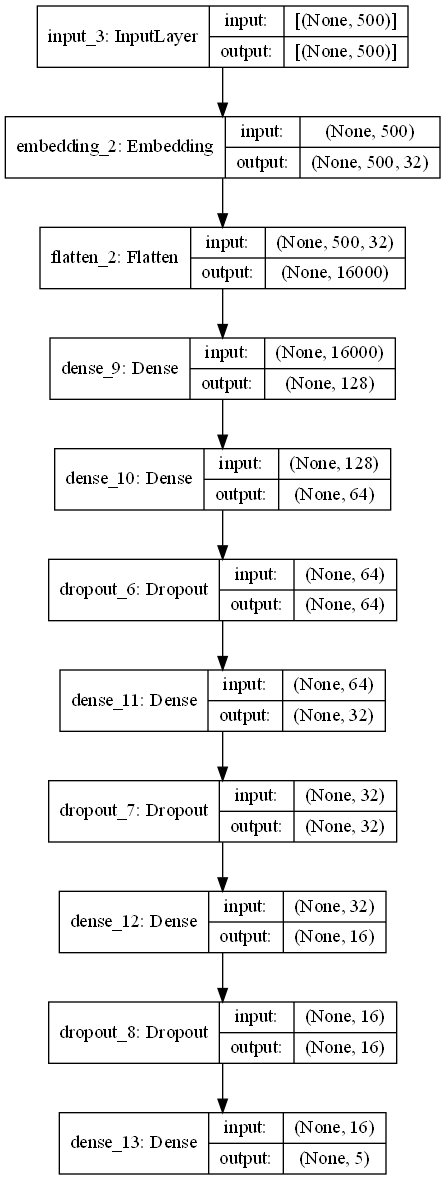

In [27]:
plot_model(mdlmlp, show_shapes=True)

In [28]:

opt =Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) #decaying learning rate
#opt =Adam(lr=0.00008)
mdlmlp.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
mlp = mdlmlp.fit(x_train,y_train,epochs=50,batch_size=32, validation_split=0.2,shuffle=True)

Train on 116024 samples, validate on 29007 samples
Epoch 1/50
116024/116024 [==============================] - 166s 1ms/sample - loss: 1.3545 - acc: 0.4617 - val_loss: 1.3557 - val_acc: 0.4594
Epoch 2/50
116024/116024 [==============================] - 164s 1ms/sample - loss: 1.3542 - acc: 0.4617 - val_loss: 1.3543 - val_acc: 0.4594
Epoch 3/50
116024/116024 [==============================] - 164s 1ms/sample - loss: 1.3541 - acc: 0.4617 - val_loss: 1.3555 - val_acc: 0.4594
Epoch 4/50
116024/116024 [==============================] - 164s 1ms/sample - loss: 1.3540 - acc: 0.4617 - val_loss: 1.3543 - val_acc: 0.4594
Epoch 5/50
116024/116024 [==============================] - 164s 1ms/sample - loss: 1.3539 - acc: 0.4617 - val_loss: 1.3556 - val_acc: 0.4594
Epoch 6/50
116024/116024 [==============================] - 164s 1ms/sample - loss: 1.3539 - acc: 0.4617 - val_loss: 1.3541 - val_acc: 0.4594
Epoch 7/50
116024/116024 [==============================] - 164s 1ms/sample - loss: 1.3538 - acc:

145031/145031 [==============================] - 21s 144us/sample - loss: 1.3534 - acc: 0.4612 6s - loss: 1.3522 - acc: 0.
Overall accuracy for training dataset: 46.124622225761414%
Overall accuracy for testing dataset: 46.17822468280792%


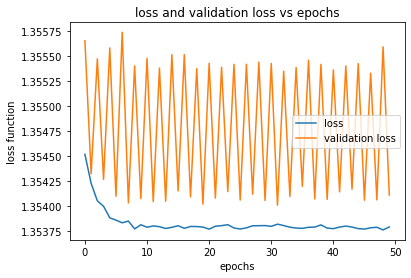

In [29]:
misc,testacc = mdlmlp.evaluate(x_test,y_test)
misc,trainacc = mdlmlp.evaluate(x_train,y_train)

print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

plt.plot(mlp.history['loss'],label="loss")
plt.plot(mlp.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()

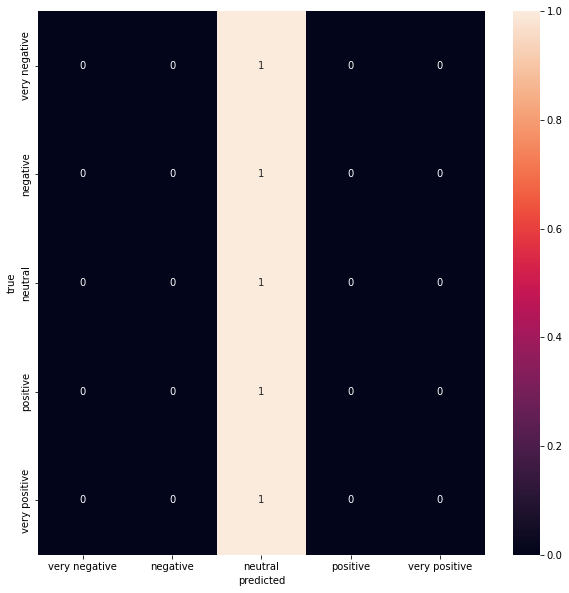

In [30]:
matrix = confusion_matrix(y_test,mdlmlp.predict(x_test).argmax(axis=-1), normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

#  RNN (Recurrent Neural Network)

In [31]:


inputs = Input(shape=(shape))
embedding = Embedding(input_dim=xshape, output_dim=32, input_length = shape)(inputs)
bi = Bidirectional(SimpleRNN(50))(embedding)
dense1 = Dense(64, activation='relu')(bi)
output = Dense(len(labels),activation='softmax')(dense1)
mdlrnn = Model(inputs,output)

mdlrnn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 500, 32)           4640992   
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               8300      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                6464      
___________________________________

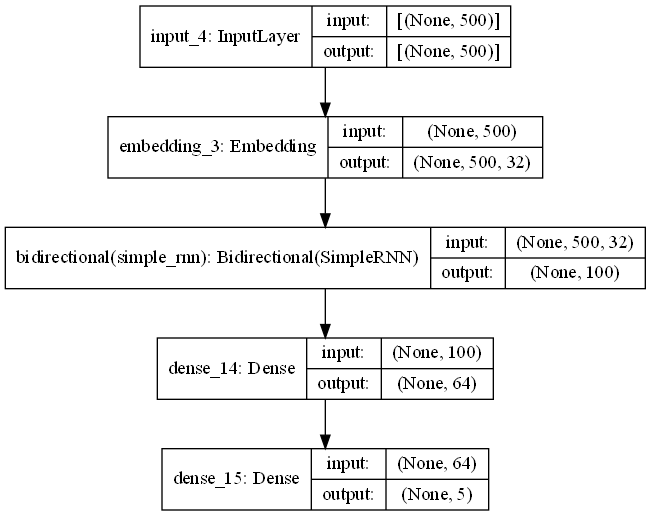

In [32]:
plot_model(mdlrnn, show_shapes=True)

In [ ]:
mdlrnn.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

rnn = mdlrnn.fit(x_train,y_train,epochs=50,batch_size=32, validation_split=0.2,shuffle=True)

Train on 116024 samples, validate on 29007 samples
Epoch 1/50
 33344/116024 [=======>......................] - ETA: 3:42 - loss: 1.3762 - acc: 0.4536

In [ ]:
misc,testacc = mdlrnn.evaluate(x_test,y_test)
misc,trainacc = mdlrnn.evaluate(x_train,y_train)

print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

plt.plot(rnn.history['loss'],label="loss")
plt.plot(rnn.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
matrix = confusion_matrix(y_test,mdlrnn.predict(x_test).argmax(axis=-1), normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

#  LSTM (Long Short-Term Memory)

In [ ]:

inputs = Input(shape=(shape))
embedding = Embedding(input_dim=xshape, output_dim=32, input_length = shape)(inputs)
bi = Bidirectional(LSTM(50))(embedding)
dense1 = Dense(64, activation='relu')(bi)
output = Dense(len(labels),activation='softmax')(dense1)
mdllstm = Model(inputs,output)

mdllstm.summary()

In [ ]:
plot_model(mdllstm, show_shapes=True)

In [ ]:
mdllstm.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

lstm1 = mdllstm.fit(x_train,y_train,epochs=50,batch_size=32, validation_split=0.2,shuffle=True)

In [ ]:
misc,testacc = mdllstm.evaluate(x_test,y_test)
misc,trainacc = mdllstm.evaluate(x_train,y_train)

print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

plt.plot(lstm1.history['loss'],label="loss")
plt.plot(lstm1.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
matrix = confusion_matrix(y_test,lstm1.predict(x_test).argmax(axis=-1), normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

# Convolutional NN

In [ ]:
# 1D CNN
inputs = Input(shape=(shape))
embedding = Embedding(input_dim=xshape, output_dim=32, input_length = shape)(inputs)
encoded_h1 = Conv1D(50,kernel_size=3, activation='relu')(embedding)
pool1 = MaxPool1D(pool_size=2)(encoded_h1)
encoded_h2 = Conv1D(40,kernel_size=3, activation='relu')(pool1)
pool2 = MaxPool1D(pool_size=2)(encoded_h2)
encoded_h3 = Conv1D(30,kernel_size=3, activation='relu')(pool2)
pool3 = MaxPool1D(pool_size=2)(encoded_h3)
flat = Flatten()(pool3)
data = Dense(20, activation='relu')(flat)
drop = Dropout(0.5)(data)
output = Dense(len(labels),activation='softmax')(drop)
mdlcnn1 = Model(inputs,output)

mdlcnn1.summary()

In [ ]:
plot_model(mdlcnn1, show_shapes=True)

In [ ]:
mdlcnn1.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

cnn1 = mdlcnn1.fit(x_train,y_train,epochs=50,batch_size=32, validation_split=0.2,shuffle=True)

In [ ]:
misc,testacc = mdlcnn1.evaluate(x_test,y_test)
misc,trainacc = mdlcnn1.evaluate(x_train,y_train)
print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

plt.plot(cnn1.history['loss'],label="loss")
plt.plot(cnn1.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()



In [ ]:
matrix = confusion_matrix(y_test,cnn1.predict(x_test).argmax(axis=-1), normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

# AE

In [ ]:
### ae - unsupervised using the cnn

shape = x_train.shape[1]
#encoder

inputs = Input(shape=(shape))
embedding = Embedding(input_dim=x_train.shape[0], output_dim=32, input_length = shape)(inputs)
encoded_h1 = Conv1D(50,kernel_size=3, activation='relu')(embedding)
pool1 = MaxPool1D(pool_size=2)(encoded_h1)
encoded_h2 = Conv1D(40,kernel_size=3, activation='relu')(pool1)
pool2 = MaxPool1D(pool_size=2)(encoded_h2)
encoded_h3 = Conv1D(30,kernel_size=3, activation='relu')(pool2)
pool3 = MaxPool1D(pool_size=2)(encoded_h3)
flat = Flatten()(pool3)
data = Dense(20, activation='relu')(flat)
drop = Dropout(0.5)(data)
output = Dense(len(labels),activation='softmax')(drop)
encoder = Model(inputs,output)



lastconv = (encoder.layers[-2].output_shape[1:]) 
dinput = Input(shape=(np.prod(lastconv),)) 
shape = Reshape(lastconv)(dinput)
dconv1 = Conv1D(30, kernel_size = 3, activation='relu')(shape)
dup1 = UpSampling1D(2)(dconv1)
dconv2 = Conv1D(40, kernel_size = 3, activation='relu')(dup1)
dup2 = UpSampling1D(2)(dconv2)
dconv3 = Conv1D(50, kernel_size = 3, activation='relu')(dup2)
dconv4 = Conv1D(2, kernel_size = 3, activation='relu')(dconv3)
dconv5= Conv1D(1, kernel_size = 3, activation='sigmoid')(dconv4)

decoder = Model(inputs=dinput, outputs=dconv5)
decoder.summary()


